Name: Sabbir Mahamud, ID: 04................................................................Project Title: Alzheimer's Disease Detection

This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

# https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [4]:
df.nunique()

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityCha

In [298]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfuln

In [299]:
# Scale numerical columns
scaler = StandardScaler()
num_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'FunctionalAssessment','ADL' ]
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,9.025679,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,7.151293,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,9.673574,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,8.392554,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,5.597238,...,0.333665,0,0,-1.684679,0,0,1,1,0,0


In [300]:
# Split the data into features and target
x = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


Training set shape: (1719, 32)
Testing set shape: (430, 32)


In [302]:
# Dictionary of models
models = {
    'Support Vector Classifier': SVC(random_state=0),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Initialize a dictionary to hold the results
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on train and test sets
    train_accuracy = accuracy_score(y_train, model.predict(x_train)) * 100
    test_accuracy = accuracy_score(y_test, model.predict(x_test)) * 100
    
    # Store the results
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


C:\Users\Abir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Model  Train Accuracy  Test Accuracy
0  Support Vector Classifier       64.688773      64.418605
1        Logistic Regression       80.337405      78.604651
2        K-Nearest Neighbors       73.240256      52.558140
3              Random Forest      100.000000      92.558140


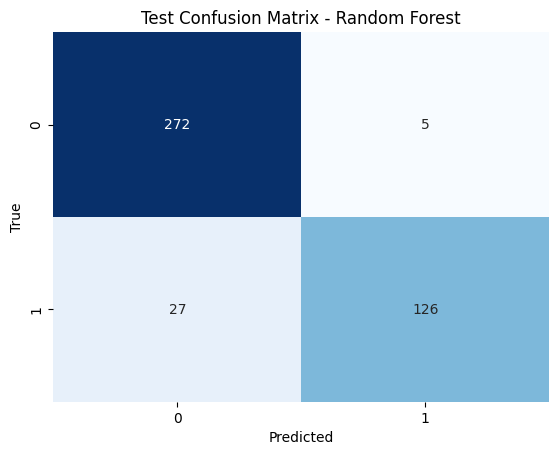

In [303]:
# Plot the confusion matrix
y_pred_test = model.predict(x_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()